In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("student_evaluation.csv")

In [14]:
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [4]:
df.shape

(5820, 33)

In [5]:
df.columns

Index(['instr', 'class', 'nb.repeat', 'attendance', 'difficulty', 'Q1', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'Q28'],
      dtype='object')

In [8]:
df["instr"].unique()

array([1, 2, 3])

In [9]:
pd.isnull(df).sum()

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

In [15]:
df.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,3.107388,3.066323,3.041924,3.165979,3.090722,3.183849,3.035567,3.242784,3.290893,3.287285,3.169588,3.398454,3.222509,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,1.280807,1.279097,1.283481,1.268930,1.275309,1.295443,1.305772,1.264201,1.255373,1.253122,1.288015,1.267530,1.279799,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [13]:
pd.set_option("display.max_columns", None)

In [25]:
kmeans = KMeans(n_clusters = 4)

In [26]:
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
predict = kmeans.predict(df)

In [83]:
pd.Series(predict).value_counts()

3    1689
0    1637
1    1357
2    1137
dtype: int64

In [29]:
kmeans.inertia_

152888.2974023118

In [30]:
kmeans.score(df)

-152888.2974023117

In [57]:
SSE = []

In [58]:
for clusters in range(1, 20):
    kmeans = KMeans(n_jobs = -1, n_clusters = clusters)
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)

In [59]:
SSE

[373025.6728522337,
 231353.7586857733,
 180375.76659547855,
 152888.20644079396,
 133015.58969638837,
 119620.31935091235,
 112463.8763555702,
 105896.2744892763,
 101318.9346326232,
 98210.49923347335,
 94165.83737528317,
 91462.14379695087,
 89257.13703825857,
 87307.58645252856,
 86238.42754257469,
 84464.11487497493,
 83269.00837181872,
 81765.96771799539,
 81082.29076829444]

In [61]:
frame = pd.DataFrame({"Cluster": range(1, 20), "SSE": SSE})

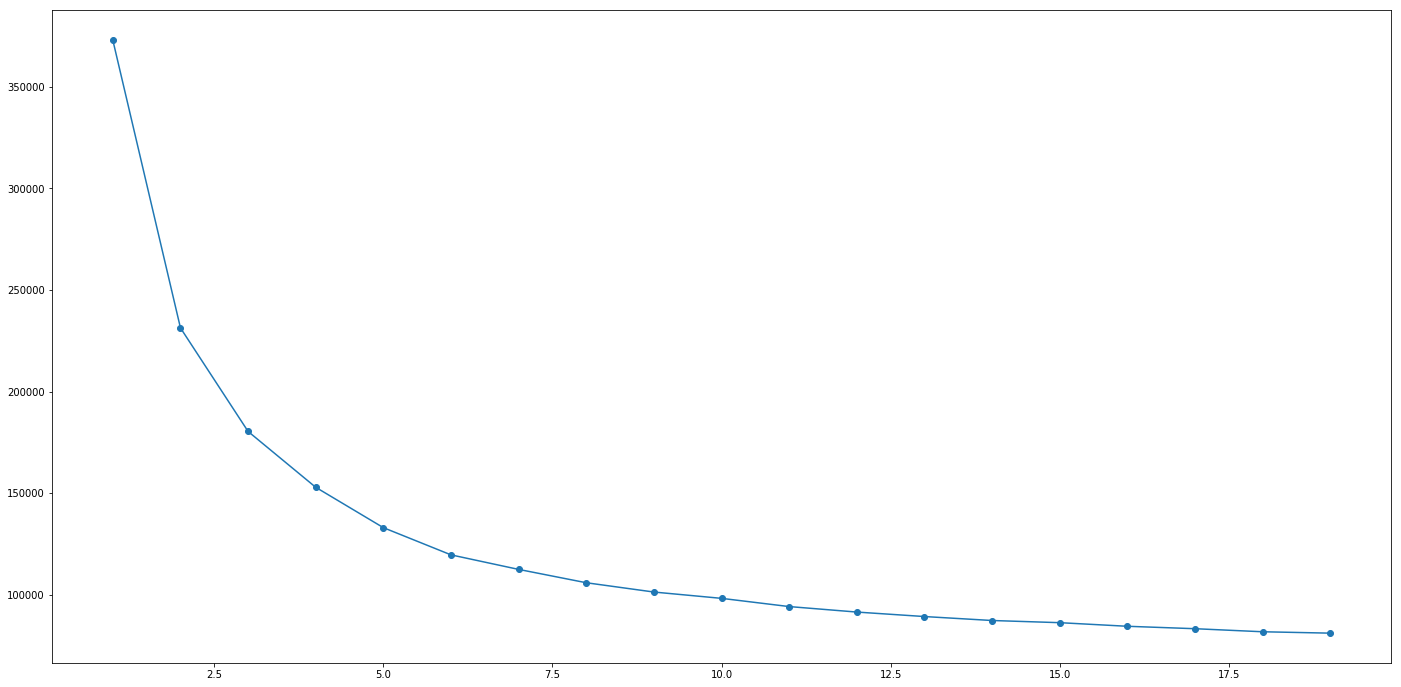

In [75]:
plt.figure(figsize = (24, 12))
plt.plot(frame["Cluster"], frame["SSE"], marker = "o")

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()

In [67]:
data_scaled = scaler.fit_transform(df)

In [71]:
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
count,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03
mean,-1.459981e-14,8.602130e-15,-7.344278e-15,-1.382514e-15,2.960976e-16,1.688760e-15,-1.091681e-15,-2.070890e-16,2.644849e-15,-8.257618e-16,-2.114384e-15,2.001606e-15,-2.075316e-15,1.337990e-15,-3.710892e-15,-5.502281e-16,1.857544e-15,9.385391e-16,-1.196294e-15,1.754076e-15,2.185423e-15,-8.511710e-16,1.865938e-15,-2.832251e-15,1.454354e-16,3.596054e-15,3.714783e-15,1.333717e-15,1.432836e-15,1.561485e-15,2.261345e-15,7.546464e-16,-1.237956e-15
std,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00
min,-2.067850e+00,-1.701879e+00,-4.021740e-01,-1.136118e+00,-1.322221e+00,-1.439189e+00,-1.613740e+00,-1.738145e+00,-1.621254e+00,-1.646630e+00,-1.645501e+00,-1.615594e+00,-1.591064e+00,-1.707080e+00,-1.639525e+00,-1.685938e+00,-1.559033e+00,-1.774225e+00,-1.825028e+00,-1.825426e+00,-1.684588e+00,-1.892390e+00,-1.736757e+00,-1.783194e+00,-1.790026e+00,-1.817034e+00,-1.827343e+00,-1.730392e+00,-1.698417e+00,-1.839472e+00,-1.748929e+00,-1.668120e+00,-1.805160e+00
25%,-6.758900e-01,-8.883988e-01,-4.021740e-01,-1.136118e+00,-1.322221e+00,-6.934552e-01,-8.356154e-01,-9.403527e-01,-8.427308e-01,-8.646959e-01,-8.646760e-01,-8.337248e-01,-8.118657e-01,-9.189468e-01,-8.553341e-01,-9.139351e-01,-7.931366e-01,-9.831431e-01,-2.317387e-01,-2.292753e-01,-9.081325e-01,-3.143815e-01,-9.553171e-01,-2.063210e-01,-2.235345e-01,-2.420638e-01,-2.503655e-01,-9.445255e-01,-9.145943e-01,-2.486068e-01,-9.618909e-01,-8.939823e-01,-2.409479e-01
50%,7.160704e-01,-7.491846e-02,-4.021740e-01,-4.580819e-01,1.605008e-01,5.227822e-02,-5.749034e-02,-1.425608e-01,-6.420806e-02,-8.276145e-02,-8.385143e-02,-5.185591e-02,-3.266742e-02,-1.308138e-01,-7.114310e-02,-1.419319e-01,-2.724063e-02,-1.920616e-01,-2.317387e-01,-2.292753e-01,-1.316772e-01,4.746225e-01,-1.738771e-01,-2.063210e-01,-2.235345e-01,-2.420638e-01,-2.503655e-01,-1.586587e-01,-1.307718e-01,-2.486068e-01,-1.748524e-01,-1.198450e-01,-2.409479e-01
75%,7.160704e-01,7.385619e-01,-4.021740e-01,8.979896e-01,9.018615e-01,7.980117e-01,7.206347e-01,6.552312e-01,7.143147e-01,6.991730e-01,6.969731e-01,7.300129e-01,7.465309e-01,6.573191e-01,7.130479e-01,6.300713e-01,7.386554e-01,5.990200e-01,5.649058e-01,5.688003e-01,6.447781e-01,4.746225e-01,6.075629e-01,5.821153e-01,5.597111e-01,5.454215e-01,5.381232e-01,6.272081e-01,6.530507e-01,5.468257e-01,6.121861e-01,6.542923e-01,5.411584e-01
max,7.160704e-01,1.552042e+00,3.354893e+00,1.576025e+00,1.643222e+00,1.543745e+00,1.498760e+00,1.453023e+00,1.492837e+00,1.481107e+00,1.477798e+00,1.511882e+00,1.525729e+00,1.445452e+00,1.497239e+00,1.402075e+00,1.504551e+00,1.390102e+00,1.361550e+00,1.366876e+00,1.421233e+00,1.263627e+00,1.389003e+00,1.370552e+00,1.342957e+00,1.332907e+00,1.326612e+00,1.413075e+00,1.436873e+00,1.342258e+00,1.399225e+00,1.428430e+00,1.323265e+00


In [79]:
SSE_scaled = []

In [80]:
for clusters in range(1, 20):
    kmeans = KMeans(n_jobs = -1, n_clusters = clusters)
    kmeans.fit(data_scaled)
    SSE_scaled.append(kmeans.inertia_)

In [81]:
frame_scaled = pd.DataFrame({"Cluster": range(1, 20), "SSE": SSE_scaled})

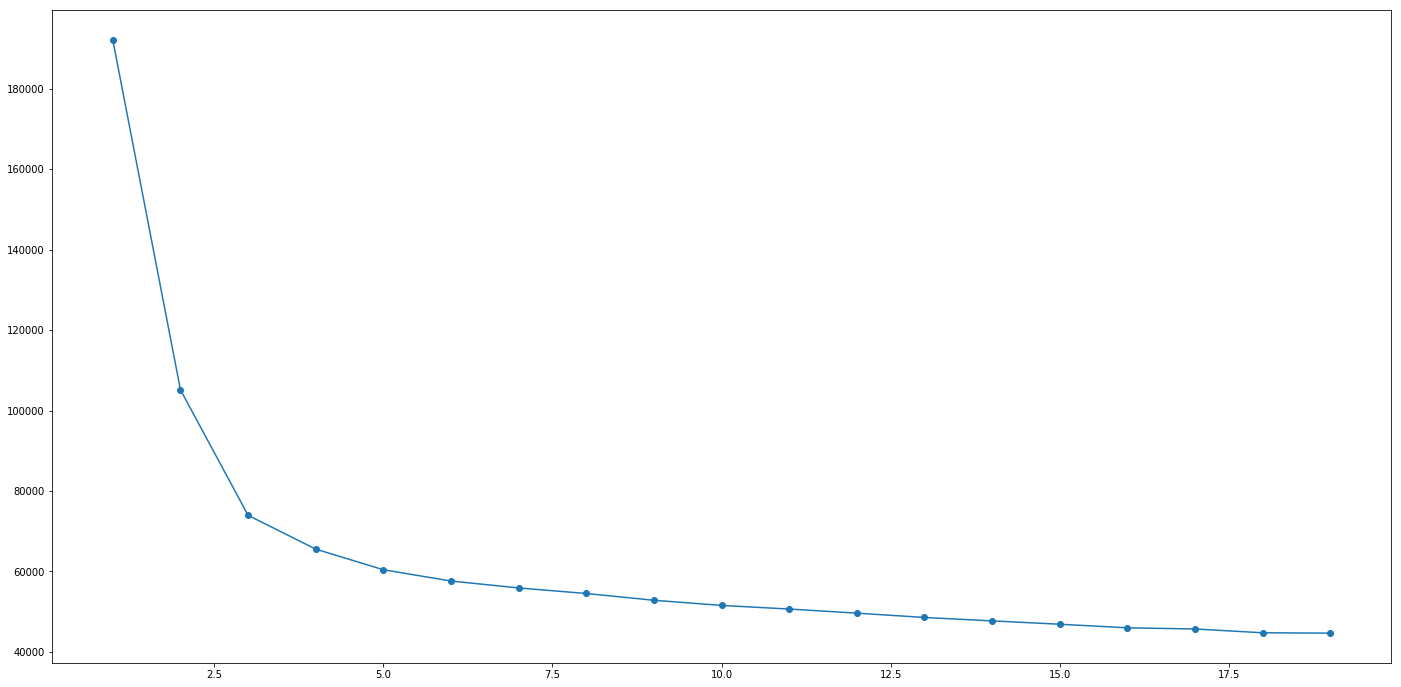

In [82]:
plt.figure(figsize = (24, 12))
plt.plot(frame_scaled["Cluster"], frame_scaled["SSE"], marker = "o")

In [84]:
kmeans = KMeans(n_jobs = -1, n_clusters = 4)
kmeans.fit(data_scaled)
predict_scaled = kmeans.predict(data_scaled)

In [85]:
predict_scaled

array([3, 3, 0, ..., 0, 1, 1], dtype=int32)

In [86]:
frame = pd.DataFrame(data_scaled)

In [88]:
frame["cluster"] = predict_scaled

In [89]:
frame

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,cluster
0,-2.06785,-1.430719,-0.402174,-1.136118,0.901862,0.052278,-0.057490,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,-0.141932,-0.027241,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,3
1,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.057490,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,-0.141932,-0.027241,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,3
2,-2.06785,-1.430719,-0.402174,0.219954,0.901862,1.543745,1.498760,1.453023,1.492837,1.481107,1.477798,1.511882,1.525729,1.445452,1.497239,1.402075,1.504551,1.390102,1.361550,1.366876,1.421233,1.263627,1.389003,1.370552,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265,0
3,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.057490,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,-0.141932,-0.027241,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,3
4,-2.06785,-1.430719,-0.402174,-1.136118,-1.322221,-1.439189,-1.613740,-1.738145,-1.621254,-1.646630,-1.645501,-1.615594,-1.591064,-1.707080,-1.639525,-1.685938,-1.559033,-1.774225,-1.825028,-1.825426,-1.684588,-1.892390,-1.736757,-1.783194,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160,1
5,-2.06785,-1.430719,-0.402174,0.897990,0.160501,0.798012,0.720635,0.655231,0.714315,0.699173,0.696973,0.730013,0.746531,0.657319,0.713048,0.630071,0.738655,0.599020,0.564906,0.568800,0.644778,0.474623,0.607563,0.582115,0.559711,0.545422,0.538123,0.627208,0.653051,0.546826,0.612186,0.654292,0.541158,2
6,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.798012,0.720635,0.655231,0.714315,0.699173,0.696973,0.730013,0.746531,0.657319,0.713048,0.630071,0.738655,0.599020,0.564906,0.568800,0.644778,0.474623,0.607563,0.582115,0.559711,0.545422,0.538123,0.627208,0.653051,0.546826,0.612186,0.654292,0.541158,2
7,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,1.543745,1.498760,1.453023,1.492837,1.481107,1.477798,1.511882,1.525729,1.445452,1.497239,1.402075,1.504551,1.390102,1.361550,1.366876,1.421233,1.263627,1.389003,1.370552,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265,0
8,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.798012,0.720635,0.655231,0.714315,0.699173,0.696973,0.730013,0.746531,0.657319,0.713048,1.402075,0.738655,0.599020,0.564906,0.568800,0.644778,0.474623,0.607563,0.582115,0.559711,0.545422,0.538123,0.627208,0.653051,0.546826,0.612186,0.654292,0.541158,2
9,-2.06785,-1.430719,-0.402174,1.576025,0.901862,0.798012,0.720635,0.655231,0.714315,0.699173,0.696973,0.730013,0.746531,0.657319,0.713048,0.630071,0.738655,0.599020,0.564906,0.568800,0.644778,0.474623,0.607563,0.582115,0.559711,0.545422,0.538123,0.627208,0.653051,0.546826,0.612186,0.654292,0.541158,2


In [90]:
frame["cluster"].value_counts()

3    2099
2    1668
1    1197
0     856
Name: cluster, dtype: int64

In [95]:
frame.loc[ frame["cluster"]==2 , : ]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,cluster
5,-2.06785,-1.430719,-0.402174,0.897990,0.160501,0.798012,0.720635,0.655231,0.714315,0.699173,0.696973,0.730013,0.746531,0.657319,0.713048,0.630071,0.738655,0.599020,0.564906,0.568800,0.644778,0.474623,0.607563,0.582115,0.559711,0.545422,0.538123,0.627208,0.653051,0.546826,0.612186,0.654292,0.541158,2
6,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.798012,0.720635,0.655231,0.714315,0.699173,0.696973,0.730013,0.746531,0.657319,0.713048,0.630071,0.738655,0.599020,0.564906,0.568800,0.644778,0.474623,0.607563,0.582115,0.559711,0.545422,0.538123,0.627208,0.653051,0.546826,0.612186,0.654292,0.541158,2
8,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.798012,0.720635,0.655231,0.714315,0.699173,0.696973,0.730013,0.746531,0.657319,0.713048,1.402075,0.738655,0.599020,0.564906,0.568800,0.644778,0.474623,0.607563,0.582115,0.559711,0.545422,0.538123,0.627208,0.653051,0.546826,0.612186,0.654292,0.541158,2
9,-2.06785,-1.430719,-0.402174,1.576025,0.901862,0.798012,0.720635,0.655231,0.714315,0.699173,0.696973,0.730013,0.746531,0.657319,0.713048,0.630071,0.738655,0.599020,0.564906,0.568800,0.644778,0.474623,0.607563,0.582115,0.559711,0.545422,0.538123,0.627208,0.653051,0.546826,0.612186,0.654292,0.541158,2
12,-2.06785,-1.430719,-0.402174,0.219954,0.160501,0.798012,0.720635,0.655231,0.714315,0.699173,0.696973,0.730013,0.746531,0.657319,0.713048,0.630071,0.738655,0.599020,0.564906,0.568800,0.644778,0.474623,0.607563,0.582115,0.559711,0.545422,0.538123,0.627208,0.653051,0.546826,0.612186,0.654292,0.541158,2
17,-2.06785,-1.430719,-0.402174,-0.458082,-0.580860,0.798012,0.720635,0.655231,0.714315,0.699173,0.696973,0.730013,0.746531,0.657319,0.713048,0.630071,0.738655,0.599020,0.564906,0.568800,0.644778,0.474623,0.607563,0.582115,0.559711,0.545422,0.538123,0.627208,0.653051,0.546826,0.612186,0.654292,0.541158,2
23,-2.06785,-1.430719,-0.402174,0.219954,0.901862,1.543745,-0.057490,-0.142561,-0.064208,-0.864696,-0.864676,-0.051856,-0.032667,-0.130814,0.713048,0.630071,1.504551,1.390102,0.564906,-0.229275,-0.131677,-0.314382,0.607563,-0.994757,-1.006780,0.545422,0.538123,1.413075,1.436873,0.546826,0.612186,1.428430,1.323265,2
26,-2.06785,-1.430719,-0.402174,-0.458082,-0.580860,-1.439189,-1.613740,-1.738145,-1.621254,1.481107,1.477798,1.511882,1.525729,1.445452,1.497239,1.402075,1.504551,1.390102,1.361550,1.366876,1.421233,1.263627,1.389003,1.370552,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265,2
29,-2.06785,-1.430719,-0.402174,0.897990,0.160501,0.798012,0.720635,0.655231,0.714315,0.699173,0.696973,0.730013,0.746531,0.657319,0.713048,0.630071,0.738655,0.599020,0.564906,0.568800,0.644778,0.474623,0.607563,0.582115,0.559711,0.545422,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,2
32,-2.06785,-1.430719,-0.402174,0.219954,0.901862,-0.693455,0.720635,0.655231,0.714315,0.699173,0.696973,0.730013,0.746531,0.657319,0.713048,0.630071,0.738655,0.599020,0.564906,0.568800,0.644778,0.474623,0.607563,0.582115,0.559711,0.545422,0.538123,0.627208,0.653051,0.546826,0.612186,0.654292,0.541158,2
